# Plotting the singals

In [1]:
from IPython.display import display
import wfdb
#import skfda

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
import pandas as pd

In [4]:
data = pd.read_csv (r'PatientsData.csv',index_col = 0)
data.head()

,age,sex,diagnosis,signals
0,65,1,4,I01 I02
1,59,0,1,I03 I04 I05
2,80,0,2,I06 I07
3,51,1,6,I08
4,68,0,6,I09 I10 I11


In [5]:
files = data.signals

In [6]:
# funzione che non mi crea subplots ma solo un plot per channel
def PlotSignals(signals, start, end, channel):
    sample = range(start,end)
    plt.figure(figsize=(12, 8))
    plt.title("Signal %d"%channel)
    plt.xlabel("Sample number")
    plt.ylabel("%d channel"%channel)
    plt.plot(range(start,end), signals[start:end,channel] , color = "black")
    plt.show()

In [38]:
# to get only tot minutes of the sample
minutes = 1
freq = 257
splsize = int(freq*minutes*60)
splsize

15420

In [43]:
# importing the signal
index = 27
signals, fields = wfdb.rdsamp(files[index][0:3])

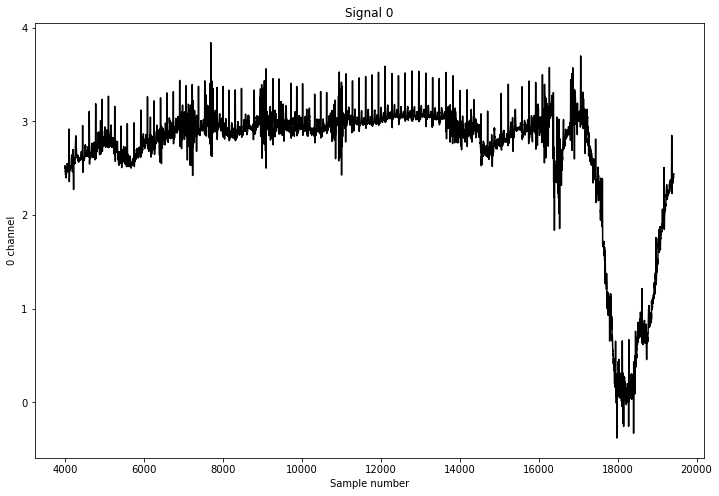

In [47]:
begin = 4000
PlotSignals(signals,begin,begin+splsize,0)

# Stop working with the filter
I'll keep the signals as they are

First 10 signals

In [ ]:
# to get only tot minutes of the sample
minutes = 1
freq = 257
splsize = int(freq*minutes*60)
splsize

In [192]:
# creo una matrice di segnali in cui ogni riga mi rappresenta un segnale -> le righe sono quindi 10

length = splsize
segnali = np.zeros([10,length])
start = 12000 +16000

sig, _ = wfdb.rdsamp('I01',channels = [0], sampfrom = start, sampto = start + length)
segnali[0,:] = sig.ravel()
sig, _ = wfdb.rdsamp('I02',channels = [0], sampfrom = start, sampto = start + length)
segnali[1,:] = sig.ravel()
sig, _ = wfdb.rdsamp('I03',channels = [0], sampfrom = start, sampto = start + length)
segnali[2,:] = sig.ravel()
sig, _ = wfdb.rdsamp('I04',channels = [0], sampfrom = start, sampto = start + length)
segnali[3,:] = sig.ravel()
sig, _ = wfdb.rdsamp('I05',channels = [0], sampfrom = start, sampto = start + length)
segnali[4,:] = sig.ravel()
sig, _ = wfdb.rdsamp('I06',channels = [0], sampfrom = start, sampto = start + length)
segnali[5,:] = sig.ravel()
sig, _ = wfdb.rdsamp('I07',channels = [0], sampfrom = start, sampto = start + length)
segnali[6,:] = sig.ravel()
sig, _ = wfdb.rdsamp('I08',channels = [0], sampfrom = start, sampto = start + length)
segnali[7,:] = sig.ravel()
sig, _ = wfdb.rdsamp('I09',channels = [0], sampfrom = start, sampto = start + length)
segnali[8,:] = sig.ravel()
sig, _ = wfdb.rdsamp('I10',channels = [0], sampfrom = start, sampto = start + length)
segnali[9,:] = sig.ravel()


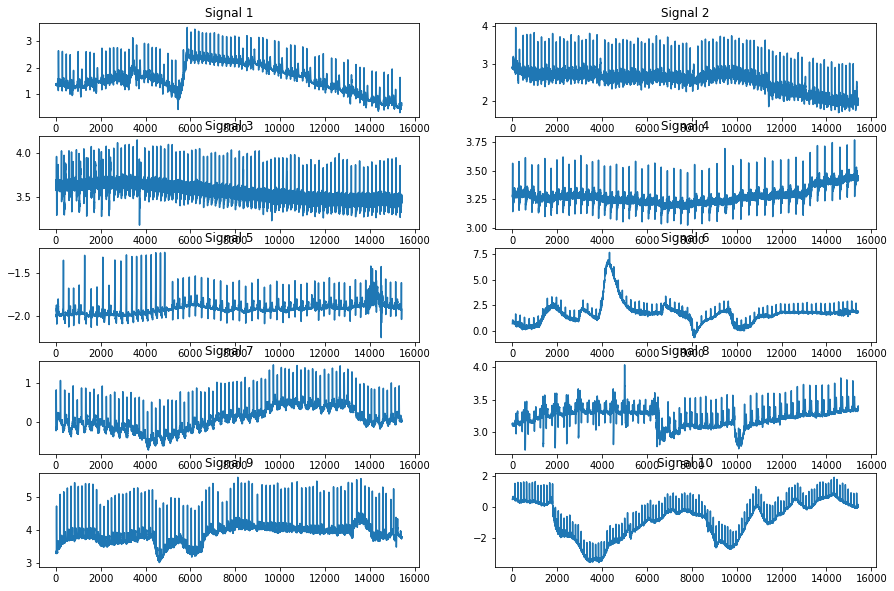

In [193]:
# plotto i primi 10 segnali 

fig, axs = plt.subplots(5, 2, figsize=(15, 10))

for i in range(10):
    axs[i//2,i%2].plot(segnali[i,:])
    axs[i//2,i%2].set_title('Signal ' + str(i+1))


In [138]:
# intervalli buoni per i segnali, starting from:
# I01 -> 1000 
# I02 -> 1000
# I03 -> 1000
# I04: 1000 
# I05: 1000 
# I06: 40000
# I07: 28000
# I08: 40000 
# I09: 40000
# I10: 3000

SyntaxError: invalid syntax (Temp/ipykernel_12052/712508218.py, line 2)

In [165]:
# qui tengo buoni i segnali che sono decenti
# non rannare nuovamente
my_signals = {'I01': segnali[0,:],
             'I02': segnali[1,:],
             'I03': segnali[2,:],
             'I04': segnali[3,:],
             'I05': segnali[4,:]}

In [168]:
# non runnare nuovamente
my_signals['I06'] = segnali[5,:]

In [194]:
my_signals['I07'] = segnali[6,:]

In [174]:
my_signals['I08'] = segnali[7,:]
my_signals['I09'] = segnali[8,:]

In [177]:
my_signals['I10'] = segnali[9,:]

In [195]:
df = pd.DataFrame(my_signals)

In [196]:
df.head()

,I01,I02,I03,I04,I05,I06,I07,I08,I09,I10
0,3.970588,2.333333,3.966378,3.379443,-1.891451,1.758333,-0.195833,3.284109,3.925197,1.775591
1,3.954248,2.330065,3.978866,3.378482,-1.892411,1.770833,-0.187500,3.268058,3.937008,1.771654
2,3.934641,2.297386,3.970221,3.381364,-1.890490,1.775000,-0.204167,3.264848,3.956693,1.771654
3,3.950980,2.281046,3.961575,3.381364,-1.887608,1.766667,-0.200000,3.264848,3.984252,1.783465
4,4.013072,2.290850,3.932757,3.365034,-1.883766,1.787500,-0.191667,3.258427,4.000000,1.755906


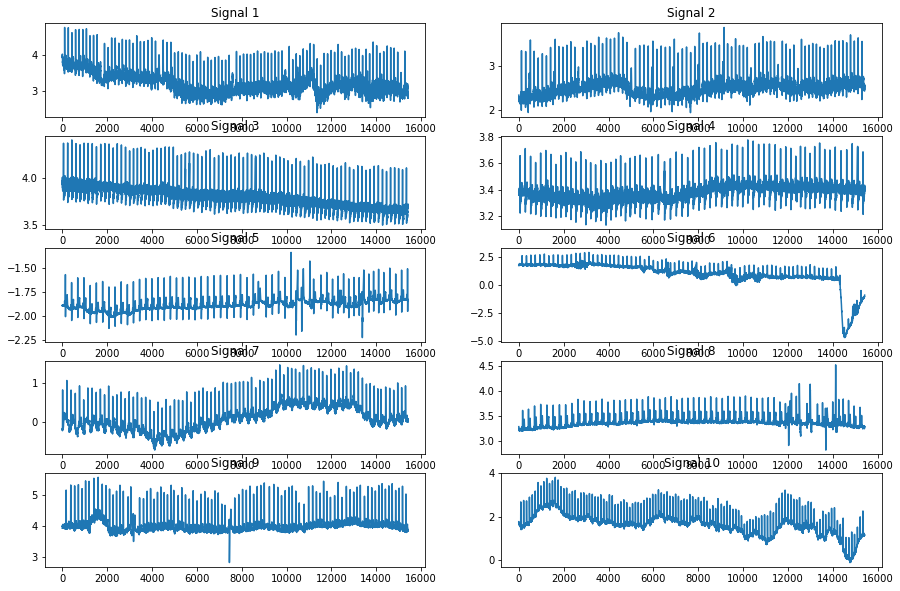

In [197]:
fig, axs = plt.subplots(5, 2, figsize=(15, 10))

for i in range(10):
    axs[i//2,i%2].plot(np.array(df.iloc[:,i]))
    axs[i//2,i%2].set_title('Signal ' + str(i+1))

In [198]:
# ok più o meno regolari 
# mo esporto questo primo df

df.to_csv(r'FirstTenSignals.csv', index = False)

### Second ten signals

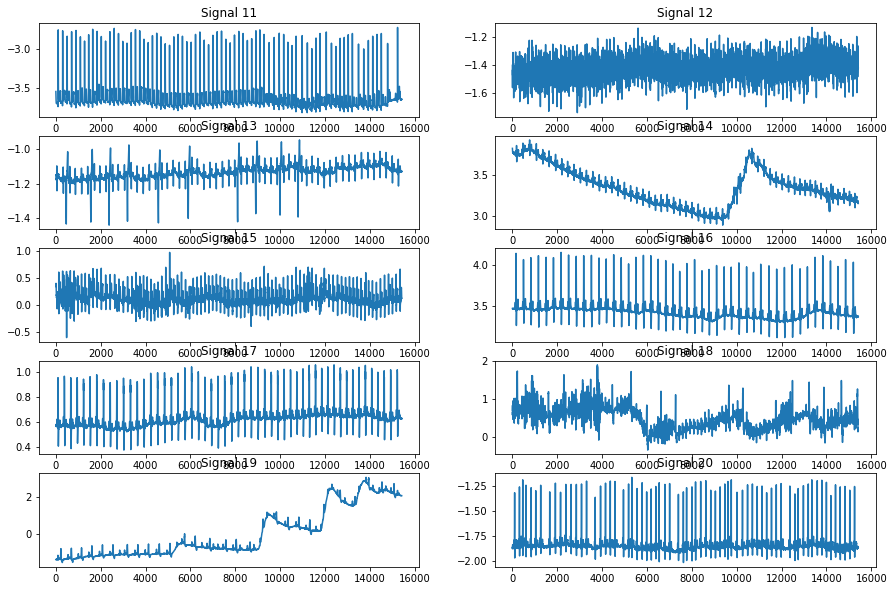

In [270]:
length = splsize
segnali = np.zeros([10,length])
start = 1000

for i in range(11,21):
    sig, _ = wfdb.rdsamp('I'+str(i),channels = [0], sampfrom = start, sampto = start + length)
    segnali[i-11,:] = sig.ravel()


fig, axs = plt.subplots(5, 2, figsize=(15, 10))

for i in range(10):
    axs[i//2,i%2].plot(segnali[i,:])
    axs[i//2,i%2].set_title('Signal ' + str(i+11))

In [250]:
# intervalli buoni per i segnali, starting from:
# I11: 1000 
# I12: 1000
# I13: 1000
# I14: 132000 (ni)
# I15: 1000
# I16: 1000
# I17: 1000
# I18: 67000
# I19: 0
# I20: 1000

In [257]:
# qui tengo buoni i segnali che sono decenti
# non rannare nuovamente
my_signals = {'I11': segnali[0,:],
             'I12': segnali[1,:],
             'I13': segnali[2,:]}

In [260]:
my_signals['I14'] = segnali[3,:]

In [263]:
my_signals['I15'] = segnali[4,:]
my_signals['I16'] = segnali[5,:]
my_signals['I17'] = segnali[6,:]

In [266]:
my_signals['I18'] = segnali[7,:]

In [269]:
my_signals['I19'] = segnali[8,:]

In [271]:
my_signals['I20'] = segnali[9,:]

In [273]:
df2 = pd.DataFrame(my_signals)

In [274]:
df2.head()

,I11,I12,I13,I14,I15,I16,I17,I18,I19,I20
0,-3.551181,-1.440843,-1.150729,3.222042,0.345104,3.476378,0.574803,-1.184641,-1.629085,-1.870833
1,-3.559055,-1.528363,-1.152350,3.223663,0.346709,3.472441,0.574803,-1.192810,-1.625817,-1.875000
2,-3.562992,-1.528363,-1.149109,3.222042,0.367576,3.472441,0.574803,-1.200980,-1.624183,-1.862500
3,-3.562992,-1.531605,-1.149109,3.225284,0.369181,3.476378,0.582677,-1.204248,-1.624183,-1.854167
4,-3.559055,-1.552674,-1.149109,3.226904,0.359551,3.472441,0.578740,-1.215686,-1.625817,-1.854167


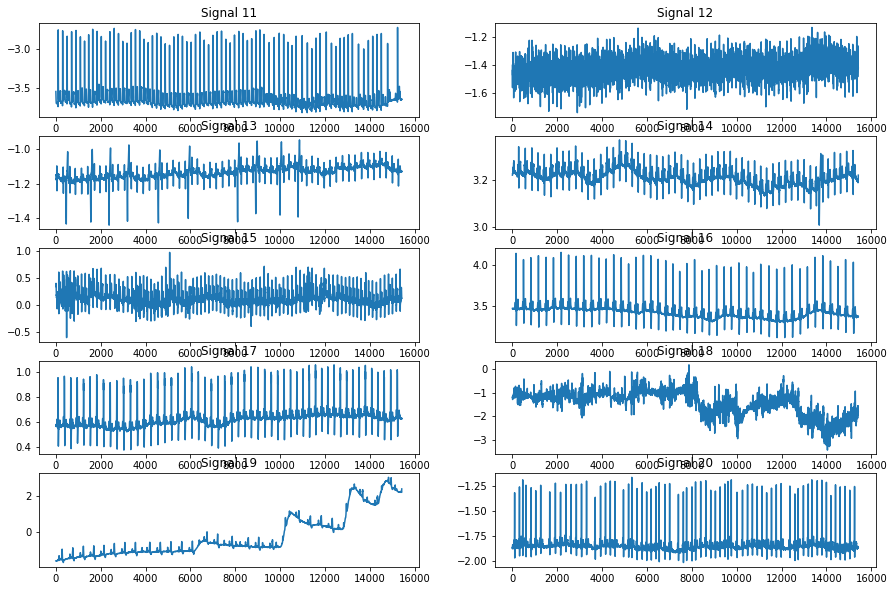

In [277]:
fig, axs = plt.subplots(5, 2, figsize=(15, 10))

for i in range(10):
    axs[i//2,i%2].plot(np.array(df2.iloc[:,i]))
    axs[i//2,i%2].set_title('Signal ' + str(i+11))

In [313]:
df2.to_csv(r'2-SecondTenSignals.csv', index = False)

### Third ten signals

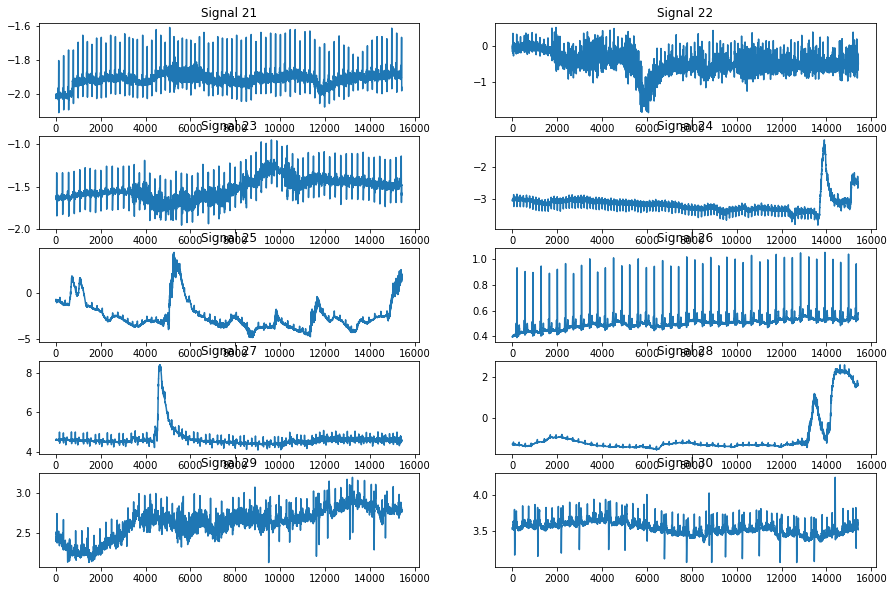

In [305]:
length = splsize
segnali = np.zeros([10,length])
start = 5000

for i in range(21,31):
    sig, _ = wfdb.rdsamp('I'+str(i),channels = [0], sampfrom = start, sampto = start + length)
    segnali[i-21,:] = sig.ravel()


fig, axs = plt.subplots(5, 2, figsize=(15, 10))

for i in range(10):
    axs[i//2,i%2].plot(segnali[i,:])
    axs[i//2,i%2].set_title('Signal ' + str(i+21))

In [250]:
# intervalli buoni per i segnali, starting from:
# I21: 5000 
# I22: 12000
# I23: 12000
# I24: 2500
# I25: 90000
# I26: 5000
# I27: ~ 12000
# I28: 90000
# I29: ~ 12000
# I30: 5000

In [307]:
starting_points = [5000, 12000, 12000, 2500, 90000, 5000, 12000, 90000, 12000, 5000]
ending_points = [el+splsize for el in starting_points]
ending_points

[20420, 27420, 27420, 17920, 105420, 20420, 27420, 105420, 27420, 20420]

In [308]:
my_signals = {}

for i in range(21,31):
    sig, _ = wfdb.rdsamp('I'+str(i),channels = [0], sampfrom = starting_points[i-21], sampto = ending_points[i-21])
    my_signals['I'+str(i)] = sig.ravel()

In [309]:
my_signals

{'I21': array([-2.00416667, -2.0125    , -2.01666667, ..., -1.97916667,
        -1.98333333, -1.9625    ]),
 'I22': array([-0.74166667, -0.75416667, -0.57083333, ..., -0.40833333,
        -0.37916667, -0.50833333]),
 'I23': array([-1.55523535, -1.60902978, -1.65513929, ..., -1.33717579,
        -1.376561  , -1.37752161]),
 'I24': array([-2.76176753, -2.73102786, -2.69836695, ..., -3.39577329,
        -3.39097022, -3.39481268]),
 'I25': array([-1.23106796, -1.2407767 , -1.24466019, ..., -0.92815534,
        -0.90679612, -0.89708738]),
 'I26': array([0.39417476, 0.3961165 , 0.39805825, ..., 0.58252427, 0.58252427,
        0.58058252]),
 'I27': array([4.59069021, 4.58908507, 4.59069021, ..., 4.18619583, 4.19261637,
        4.19743178]),
 'I28': array([0.40128411, 0.40288925, 0.40288925, ..., 0.00321027, 0.00321027,
        0.00321027]),
 'I29': array([2.56401945, 2.5445705 , 2.47974068, ..., 2.22690438, 2.26418152,
        2.30632091]),
 'I30': array([3.52025932, 3.53484603, 3.54619125, .

In [310]:
df3 = pd.DataFrame(my_signals)

In [311]:
df3.head()

,I21,I22,I23,I24,I25,I26,I27,I28,I29,I30
0,-2.004167,-0.741667,-1.555235,-2.761768,-1.231068,0.394175,4.590690,0.401284,2.564019,3.520259
1,-2.012500,-0.754167,-1.609030,-2.731028,-1.240777,0.396117,4.589085,0.402889,2.544571,3.534846
2,-2.016667,-0.570833,-1.655139,-2.698367,-1.244660,0.398058,4.590690,0.402889,2.479741,3.546191
3,-2.020833,-0.541667,-1.605187,-2.667627,-1.244660,0.396117,4.593900,0.401284,2.497569,3.544571
4,-2.012500,-0.616667,-1.596542,-2.629203,-1.252427,0.398058,4.605136,0.402889,2.505673,3.546191


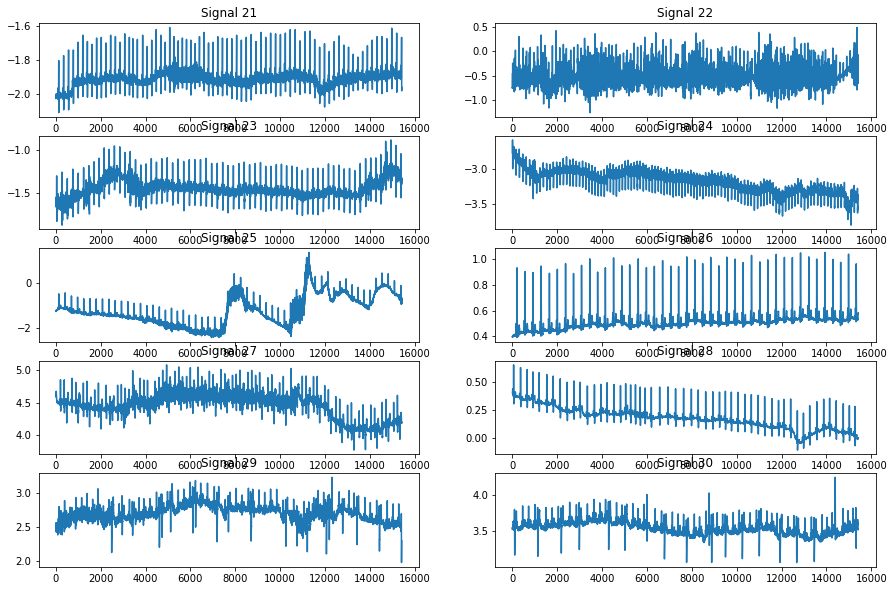

In [312]:
fig, axs = plt.subplots(5, 2, figsize=(15, 10))

for i in range(10):
    axs[i//2,i%2].plot(np.array(df3.iloc[:,i]))
    axs[i//2,i%2].set_title('Signal ' + str(i+21))

In [314]:
df3.to_csv(r'3-ThirdTenSignals.csv', index = False)

### Fourth ten signals

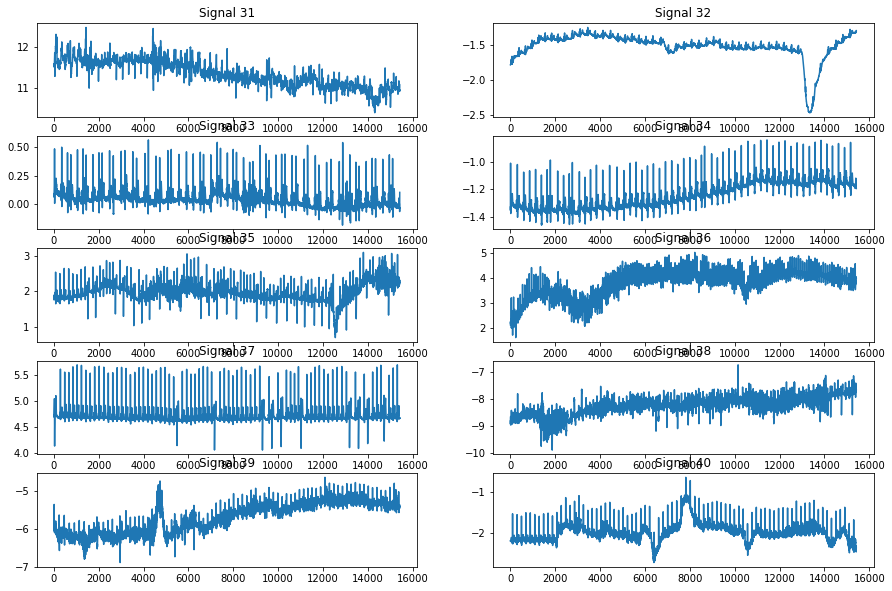

In [335]:
length = splsize
segnali = np.zeros([10,length])
start = 5000 + 4000 

index = 31

for i in range(index,index+10):
    sig, _ = wfdb.rdsamp('I'+str(i),channels = [0], sampfrom = start, sampto = start + length)
    segnali[i-index,:] = sig.ravel()


fig, axs = plt.subplots(5, 2, figsize=(15, 10))

for i in range(10):
    axs[i//2,i%2].plot(segnali[i,:])
    axs[i//2,i%2].set_title('Signal ' + str(i+index))

In [250]:
# intervalli buoni per i segnali, starting from:
# I31: 9000
# I32: 103800
# I33: 5000
# I34: 5000
# I35: 100000
# I36: 100000 (questa fa schifo ovunque)
# I37: 5000
# I38: 15000
# I39: 9000
# I40: 98000

In [336]:
starting_points = [9000, 103800, 5000, 5000, 100000, 100000, 5000, 15000, 9000, 98000]
ending_points = [el+splsize for el in starting_points]
ending_points

[24420, 119220, 20420, 20420, 115420, 115420, 20420, 30420, 24420, 113420]

In [337]:
my_signals = {}

for i in range(index,index+10):
    sig, _ = wfdb.rdsamp('I'+str(i),channels = [0], sampfrom = starting_points[i-index], sampto = ending_points[i-index])
    my_signals['I'+str(i)] = sig.ravel()

In [338]:
my_signals

{'I31': array([11.51863857, 11.53322528, 11.54619125, ..., 10.93679092,
        10.94813614, 10.93517018]),
 'I32': array([0.29335494, 0.29497569, 0.29335494, ..., 0.60615883, 0.54781199,
        0.55753647]),
 'I33': array([ 0.22366288,  0.21555916,  0.21555916, ..., -0.02269044,
        -0.01944895, -0.01620746]),
 'I34': array([-1.28200972, -1.28038898, -1.28038898, ..., -1.15072934,
        -1.16045381, -1.16207455]),
 'I35': array([2.90196078, 2.90686275, 2.90849673, ..., 2.72385621, 2.72222222,
        2.68464052]),
 'I36': array([4.29575163, 4.2875817 , 4.24019608, ..., 2.82189542, 2.92973856,
        3.14869281]),
 'I37': array([5.14215686, 5.13562092, 5.11928105, ..., 4.69281046, 4.69771242,
        4.69444444]),
 'I38': array([-8.08754864, -8.15175097, -8.20038911, ..., -7.07782101,
        -7.04085603, -6.91245136]),
 'I39': array([-5.80933852, -5.88132296, -5.88910506, ..., -5.41439689,
        -5.37937743, -5.36575875]),
 'I40': array([-2.105939  , -2.1011236 , -2.08186196

In [339]:
df4 = pd.DataFrame(my_signals)

In [340]:
df4.head()

,I31,I32,I33,I34,I35,I36,I37,I38,I39,I40
0,11.518639,0.293355,0.223663,-1.282010,2.901961,4.295752,5.142157,-8.087549,-5.809339,-2.105939
1,11.533225,0.294976,0.215559,-1.280389,2.906863,4.287582,5.135621,-8.151751,-5.881323,-2.101124
2,11.546191,0.293355,0.215559,-1.280389,2.908497,4.240196,5.119281,-8.200389,-5.889105,-2.081862
3,11.565640,0.294976,0.217180,-1.280389,2.911765,4.210784,5.101307,-8.192607,-5.887160,-2.072231
4,11.583468,0.293355,0.212318,-1.280389,2.867647,4.045752,5.086601,-8.202335,-5.850195,-2.096308


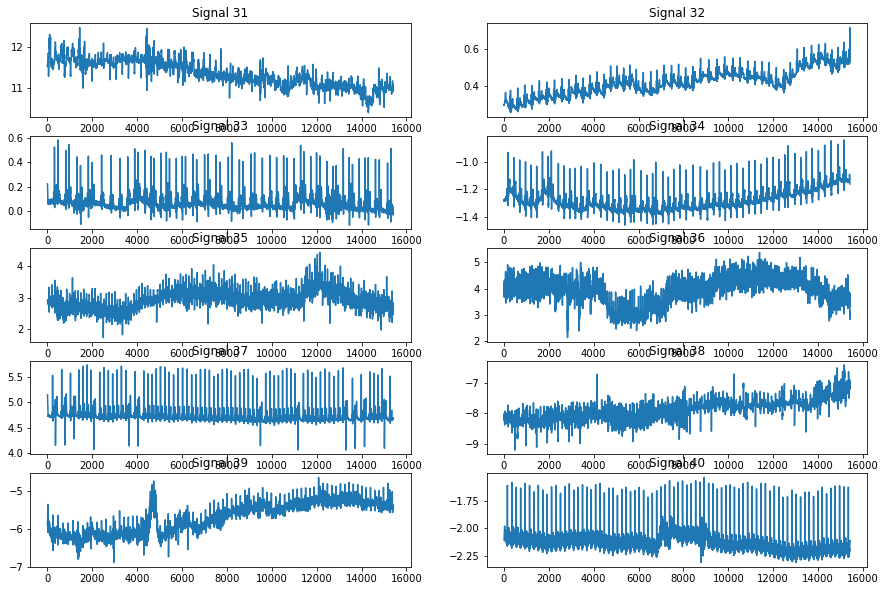

In [341]:
fig, axs = plt.subplots(5, 2, figsize=(15, 10))

for i in range(10):
    axs[i//2,i%2].plot(np.array(df4.iloc[:,i]))
    axs[i//2,i%2].set_title('Signal ' + str(i+index))

In [342]:
df4.to_csv(r'4-FourthTenSignals.csv', index = False)

### Fifth ten signals

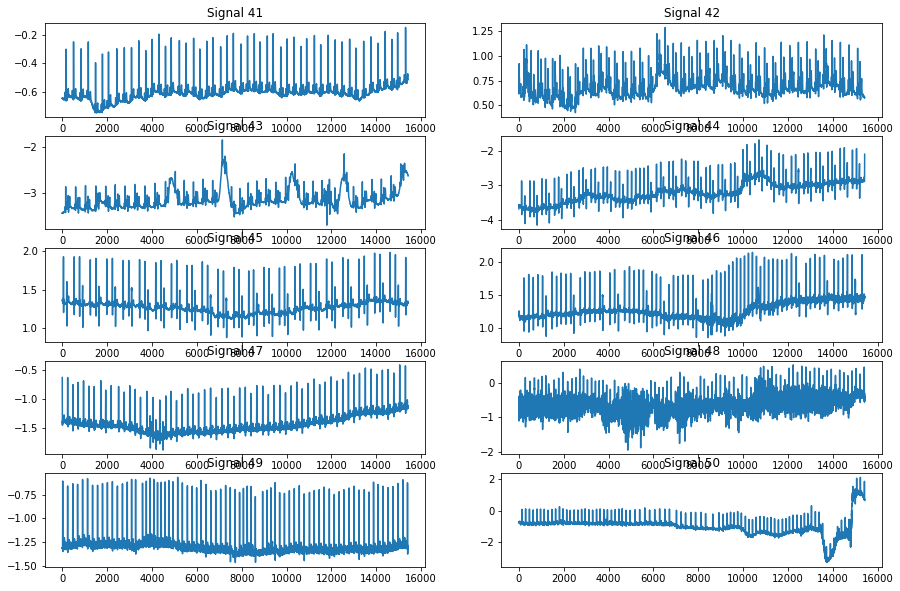

In [351]:
length = splsize
segnali = np.zeros([10,length])
start = 1000 + 4000 +2000 +8000 

index = 41

for i in range(index,index+10):
    sig, _ = wfdb.rdsamp('I'+str(i),channels = [0], sampfrom = start, sampto = start + length)
    segnali[i-index,:] = sig.ravel()


fig, axs = plt.subplots(5, 2, figsize=(15, 10))

for i in range(10):
    axs[i//2,i%2].plot(segnali[i,:])
    axs[i//2,i%2].set_title('Signal ' + str(i+index))

In [250]:
# intervalli buoni per i segnali, starting from:
# I41: 1000
# I42: 7000
# I43: 7000
# I44: 1000
# I45: 15000
# I46: 1000
# I47: 11000
# I48: 11000
# I49: 1000
# I50: 1000

In [352]:
start

15000

In [353]:
starting_points = [1000, 7000, 7000, 1000, 15000, 1000, 11000, 11000, 1000, 1000]
ending_points = [el+splsize for el in starting_points]
ending_points

[16420, 22420, 22420, 16420, 30420, 16420, 26420, 26420, 16420, 16420]

In [354]:
my_signals = {}

for i in range(index,index+10):
    sig, _ = wfdb.rdsamp('I'+str(i),channels = [0], sampfrom = starting_points[i-index], sampto = ending_points[i-index])
    my_signals['I'+str(i)] = sig.ravel()

In [355]:
my_signals

{'I41': array([-0.73194222, -0.73033708, -0.72873194, ..., -0.7223114 ,
        -0.7223114 , -0.7223114 ]),
 'I42': array([0.64667747, 0.65153971, 0.64829822, ..., 0.75688817, 0.76823339,
        0.77795786]),
 'I43': array([-3.35656402, -3.35818476, -3.35980551, ..., -2.93192869,
        -2.93354943, -2.93192869]),
 'I44': array([-3.98856209, -3.97875817, -3.97385621, ..., -3.53921569,
        -3.55065359, -3.55555556]),
 'I45': array([1.35294118, 1.3496732 , 1.35130719, ..., 1.32352941, 1.32352941,
        1.32843137]),
 'I46': array([1.14215686, 1.1503268 , 1.15359477, ..., 1.20424837, 1.19771242,
        1.18627451]),
 'I47': array([-1.33621518, -1.28818444, -1.28530259, ..., -1.41018252,
        -1.4024976 , -1.39193084]),
 'I48': array([-0.73294909, -0.84726225, -0.86647454, ..., -0.52929875,
        -0.51585014, -0.55235351]),
 'I49': array([-1.11067961, -1.11262136, -1.11650485, ..., -1.24660194,
        -1.24466019, -1.24271845]),
 'I50': array([-0.70873786, -0.70485437, -0.71

In [356]:
df5 = pd.DataFrame(my_signals)

In [357]:
df5.head()

,I41,I42,I43,I44,I45,I46,I47,I48,I49,I50
0,-0.731942,0.646677,-3.356564,-3.988562,1.352941,1.142157,-1.336215,-0.732949,-1.110680,-0.708738
1,-0.730337,0.651540,-3.358185,-3.978758,1.349673,1.150327,-1.288184,-0.847262,-1.112621,-0.704854
2,-0.728732,0.648298,-3.359806,-3.973856,1.351307,1.153595,-1.285303,-0.866475,-1.116505,-0.714563
3,-0.730337,0.648298,-3.361426,-3.977124,1.351307,1.156863,-1.293948,-0.703170,-1.122330,-0.720388
4,-0.725522,0.662885,-3.363047,-3.982026,1.349673,1.161765,-1.304515,-0.574448,-1.100971,-0.735922


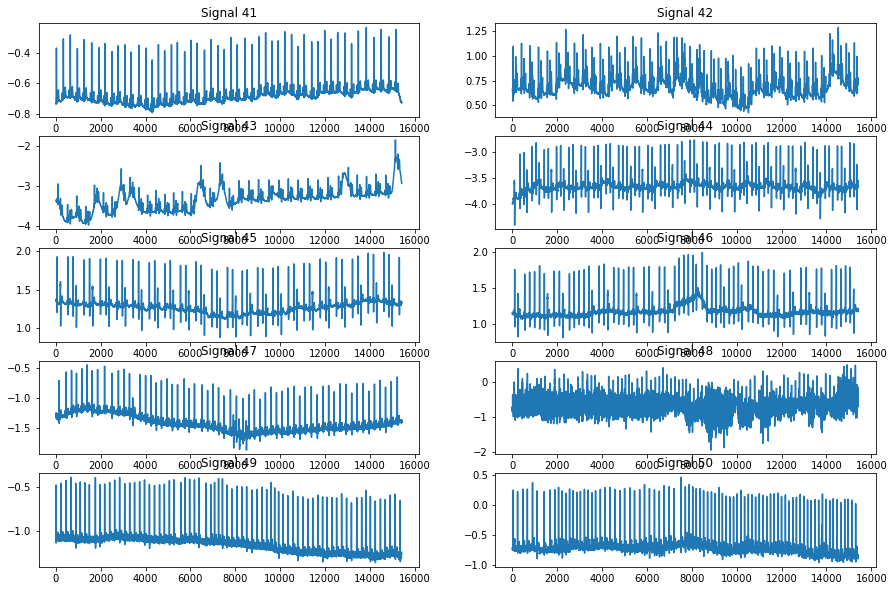

In [358]:
fig, axs = plt.subplots(5, 2, figsize=(15, 10))

for i in range(10):
    axs[i//2,i%2].plot(np.array(df5.iloc[:,i]))
    axs[i//2,i%2].set_title('Signal ' + str(i+index))

In [359]:
df5.to_csv(r'5-FifthTenSignals.csv', index = False)

### Sixth ten signals

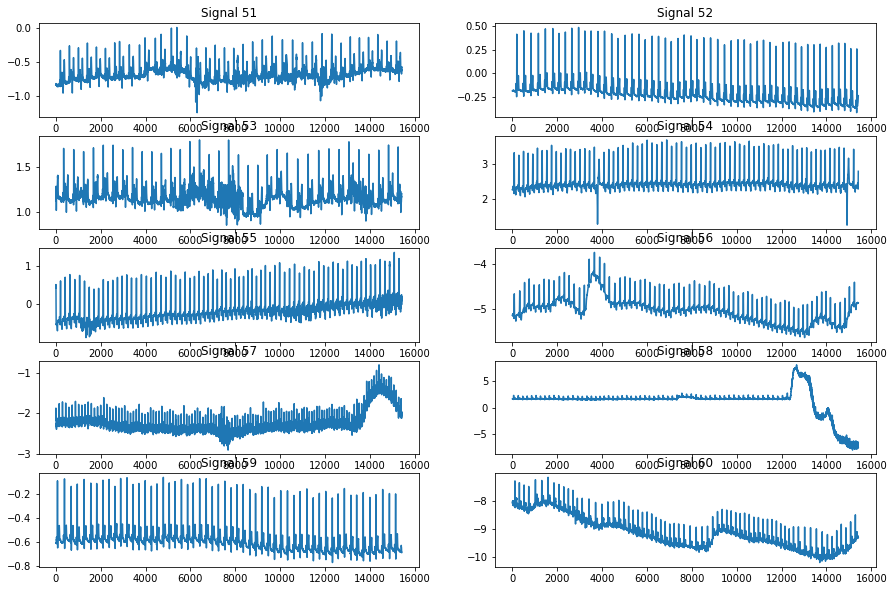

In [377]:
length = splsize
segnali = np.zeros([10,length])
start = 100000 

index = 51

for i in range(index,index+10):
    sig, _ = wfdb.rdsamp('I'+str(i),channels = [0], sampfrom = start, sampto = start + length)
    segnali[i-index,:] = sig.ravel()


fig, axs = plt.subplots(5, 2, figsize=(15, 10))

for i in range(10):
    axs[i//2,i%2].plot(segnali[i,:])
    axs[i//2,i%2].set_title('Signal ' + str(i+index))

In [250]:
# intervalli buoni per i segnali, starting from:
# I31: 100000
# I32: 9000
# I33: 100000
# I34: 9000
# I35: 100000
# I36: 120000
# I37: 78000
# I38: 9000
# I39: 9000
# I40: 100000

In [378]:
start

100000

In [379]:
starting_points = [100000, 9000, 100000, 9000, 100000, 120000, 78000, 9000, 9000, 100000]
ending_points = [el+splsize for el in starting_points]
ending_points

[115420, 24420, 115420, 24420, 115420, 135420, 93420, 24420, 24420, 115420]

In [380]:
my_signals = {}

for i in range(index,index+10):
    sig, _ = wfdb.rdsamp('I'+str(i),channels = [0], sampfrom = starting_points[i-index], sampto = ending_points[i-index])
    my_signals['I'+str(i)] = sig.ravel()

In [381]:
my_signals

{'I51': array([-0.82820097, -0.82820097, -0.82658023, ..., -0.56726094,
        -0.56401945, -0.57536467]),
 'I52': array([0.5267423 , 0.45705024, 0.37763371, ..., 0.00972447, 0.00972447,
        0.00972447]),
 'I53': array([1.12317666, 1.13290113, 1.14100486, ..., 1.18638574, 1.19611021,
        1.20097245]),
 'I54': array([2.83006536, 2.82352941, 2.81699346, ..., 2.56699346, 2.58006536,
        2.59313725]),
 'I55': array([0.4379085 , 0.42647059, 0.44117647, ..., 0.19771242, 0.17810458,
        0.15849673]),
 'I56': array([-5.44771242, -5.44281046, -5.43627451, ..., -5.35130719,
        -5.3496732 , -5.34803922]),
 'I57': array([-1.9481268 , -1.93371758, -1.93563881, ..., -2.25360231,
        -2.246878  , -2.26512968]),
 'I58': array([1.62247839, 1.60614793, 1.59942363, ..., 1.70605187, 1.71853987,
        1.77425552]),
 'I59': array([-0.28038898, -0.27876823, -0.27714749, ..., -0.27066451,
        -0.26904376, -0.26742301]),
 'I60': array([-8.05672609, -8.07455429, -8.07455429, ...,

In [382]:
df6 = pd.DataFrame(my_signals)

In [383]:
df6.head()

,I51,I52,I53,I54,I55,I56,I57,I58,I59,I60
0,-0.828201,0.526742,1.123177,2.830065,0.437908,-5.447712,-1.948127,1.622478,-0.280389,-8.056726
1,-0.828201,0.457050,1.132901,2.823529,0.426471,-5.442810,-1.933718,1.606148,-0.278768,-8.074554
2,-0.826580,0.377634,1.141005,2.816993,0.441176,-5.436275,-1.935639,1.599424,-0.277147,-8.074554
3,-0.831442,0.301459,1.147488,2.820261,0.504902,-5.431373,-1.967339,1.605187,-0.275527,-8.072934
4,-0.833063,0.235008,1.149109,2.821895,0.517974,-5.428105,-1.963497,1.621518,-0.275527,-8.068071


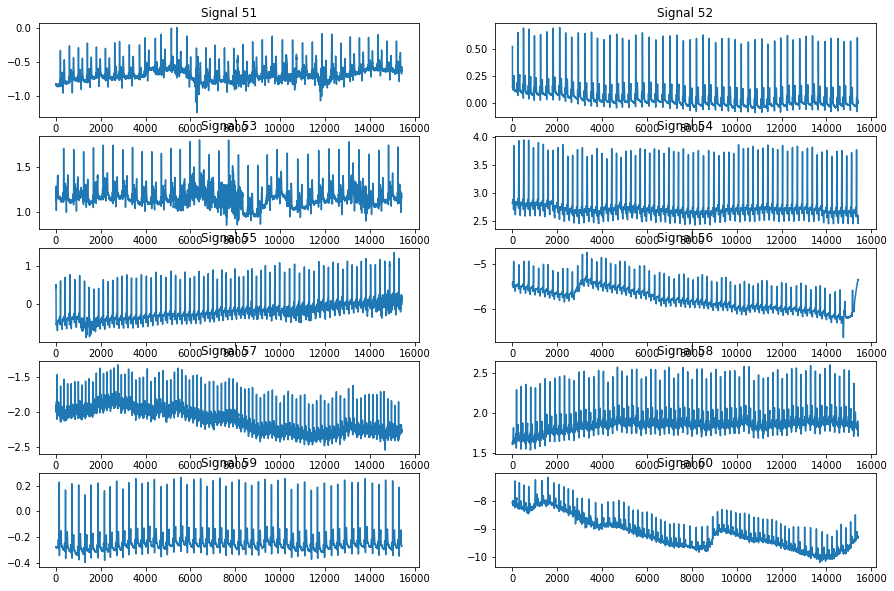

In [384]:
fig, axs = plt.subplots(5, 2, figsize=(15, 10))

for i in range(10):
    axs[i//2,i%2].plot(np.array(df6.iloc[:,i]))
    axs[i//2,i%2].set_title('Signal ' + str(i+index))

In [385]:
df6.to_csv(r'6-SixthTenSignals.csv', index = False)

### Sevenths ten signals

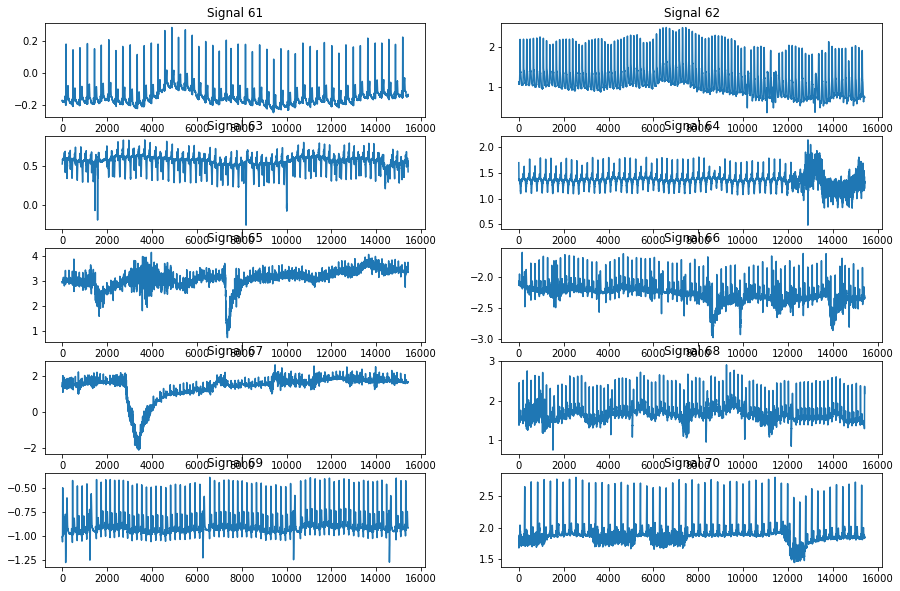

In [408]:
length = splsize
segnali = np.zeros([10,length])
start = 100000 - 10000

index = 61

for i in range(index,index+10):
    sig, _ = wfdb.rdsamp('I'+str(i),channels = [0], sampfrom = start, sampto = start + length)
    segnali[i-index,:] = sig.ravel()


fig, axs = plt.subplots(5, 2, figsize=(15, 10))

for i in range(10):
    axs[i//2,i%2].plot(segnali[i,:])
    axs[i//2,i%2].set_title('Signal ' + str(i+index))

In [250]:
# intervalli buoni per i segnali, starting from:
# I31: 5000
# I32: 100000
# I33: 9000
# I34: 15000
# I35: 122000
# I36: 126000
# I37: 100000
# I38: 90000
# I39: 5000
# I40: 11000

In [409]:
start

90000

In [410]:
starting_points = [5000, 100000, 9000, 15000, 122000, 126000, 100000, 90000, 5000, 11000]
ending_points = [el+splsize for el in starting_points]
ending_points

[20420, 115420, 24420, 30420, 137420, 141420, 115420, 105420, 20420, 26420]

In [411]:
my_signals = {}

for i in range(index,index+10):
    sig, _ = wfdb.rdsamp('I'+str(i),channels = [0], sampfrom = starting_points[i-index], sampto = ending_points[i-index])
    my_signals['I'+str(i)] = sig.ravel()

In [412]:
my_signals

{'I61': array([0.76012966, 0.76175041, 0.76012966, ..., 0.72285251, 0.72285251,
        0.72285251]),
 'I62': array([0.85019455, 0.8540856 , 0.85603113, ..., 2.08754864, 2.01167315,
        1.89688716]),
 'I63': array([0.29182879, 0.30155642, 0.30155642, ..., 0.23540856, 0.23929961,
        0.24708171]),
 'I64': array([1.1848249 , 1.18093385, 1.16536965, ..., 1.13229572, 1.12451362,
        1.12256809]),
 'I65': array([3.47351525, 3.47351525, 3.4670947 , ..., 3.66131621, 3.50722311,
        3.37720706]),
 'I66': array([-2.25682183, -2.31781701, -2.34189406, ..., -2.24077047,
        -2.24719101, -2.25040128]),
 'I67': array([1.78330658, 1.80738363, 1.85232745, ..., 1.92134831, 1.87479936,
        1.78651685]),
 'I68': array([1.42829457, 1.43992248, 1.45348837, ..., 2.36046512, 2.29844961,
        2.18023256]),
 'I69': array([-1.19767442, -1.19186047, -1.1879845 , ..., -1.19186047,
        -1.19379845, -1.19573643]),
 'I70': array([1.64112903, 1.60887097, 1.60080645, ..., 1.89919355, 1.

In [413]:
df7 = pd.DataFrame(my_signals)

In [414]:
df7.head()

,I61,I62,I63,I64,I65,I66,I67,I68,I69,I70
0,0.760130,0.850195,0.291829,1.184825,3.473515,-2.256822,1.783307,1.428295,-1.197674,1.641129
1,0.761750,0.854086,0.301556,1.180934,3.473515,-2.317817,1.807384,1.439922,-1.191860,1.608871
2,0.760130,0.856031,0.301556,1.165370,3.467095,-2.341894,1.852327,1.453488,-1.187984,1.600806
3,0.758509,0.857977,0.311284,1.155642,3.478331,-2.346709,1.868379,1.445736,-1.186047,1.596774
4,0.756888,0.854086,0.319066,1.163424,3.457464,-2.306581,1.842697,1.443798,-1.178295,1.584677


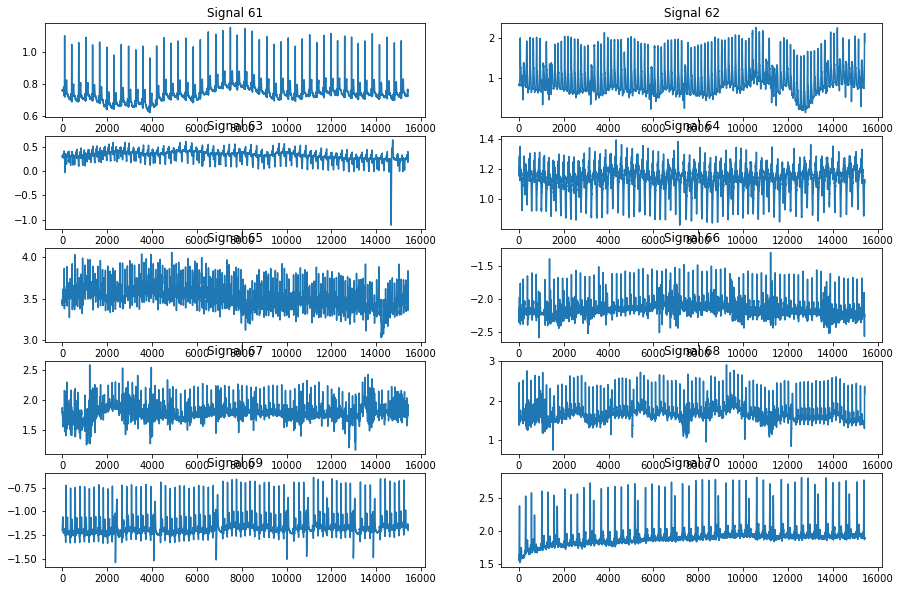

In [415]:
fig, axs = plt.subplots(5, 2, figsize=(15, 10))

for i in range(10):
    axs[i//2,i%2].plot(np.array(df7.iloc[:,i]))
    axs[i//2,i%2].set_title('Signal ' + str(i+index))

In [416]:
df7.to_csv(r'7-SeventhTenSignals.csv', index = False)

### Last signals (5)

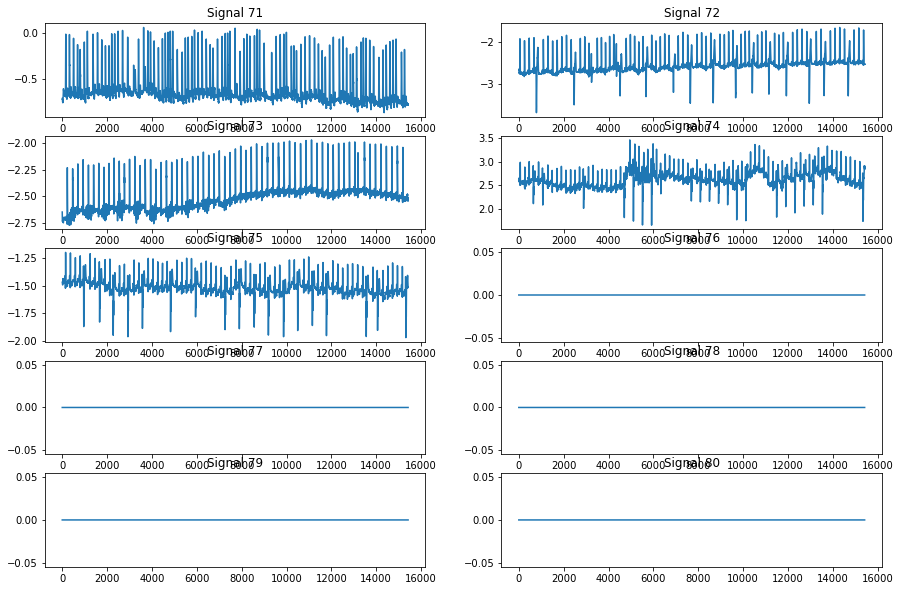

In [429]:
length = splsize
segnali = np.zeros([10,length])
start = 200000 - 15000

index = 71

for i in range(index,index+5):
    sig, _ = wfdb.rdsamp('I'+str(i),channels = [0], sampfrom = start, sampto = start + length)
    segnali[i-index,:] = sig.ravel()


fig, axs = plt.subplots(5, 2, figsize=(15, 10))

for i in range(10):
    axs[i//2,i%2].plot(segnali[i,:])
    axs[i//2,i%2].set_title('Signal ' + str(i+index))

In [250]:
# intervalli buoni per i segnali, starting from:
# I31: 5000
# I32: 5000
# I33: 54000
# I34: 185000
# I35: 185000
# I36: 
# I37: 
# I38: 
# I39: 
# I40: 

In [430]:
start

185000

In [431]:
starting_points = [5000, 5000, 54000, 185000, 185000]
ending_points = [el+splsize for el in starting_points]
ending_points

[20420, 20420, 69420, 200420, 200420]

In [432]:
my_signals = {}

for i in range(index,index+5):
    sig, _ = wfdb.rdsamp('I'+str(i),channels = [0], sampfrom = starting_points[i-index], sampto = ending_points[i-index])
    my_signals['I'+str(i)] = sig.ravel()

In [433]:
my_signals

{'I71': array([-0.79032258, -0.79032258, -0.79032258, ..., -0.59274194,
        -0.60483871, -0.60483871]),
 'I72': array([-2.42709313, -2.4289746 , -2.42427093, ..., -2.30761994,
        -2.30761994, -2.30950141]),
 'I73': array([-1.88899341, -1.89087488, -1.88993415, ..., -2.02257761,
        -2.02163688, -2.02634055]),
 'I74': array([2.59313725, 2.58333333, 2.58006536, ..., 2.85620915, 2.84803922,
        2.84150327]),
 'I75': array([-1.46895425, -1.47058824, -1.47222222, ..., -1.51470588,
        -1.51797386, -1.51633987])}

In [434]:
df8 = pd.DataFrame(my_signals)

In [435]:
df8.head()

,I71,I72,I73,I74,I75
0,-0.790323,-2.427093,-1.888993,2.593137,-1.468954
1,-0.790323,-2.428975,-1.890875,2.583333,-1.470588
2,-0.790323,-2.424271,-1.889934,2.580065,-1.472222
3,-0.798387,-2.423330,-1.891816,2.588235,-1.473856
4,-0.802419,-2.424271,-1.897460,2.596405,-1.475490


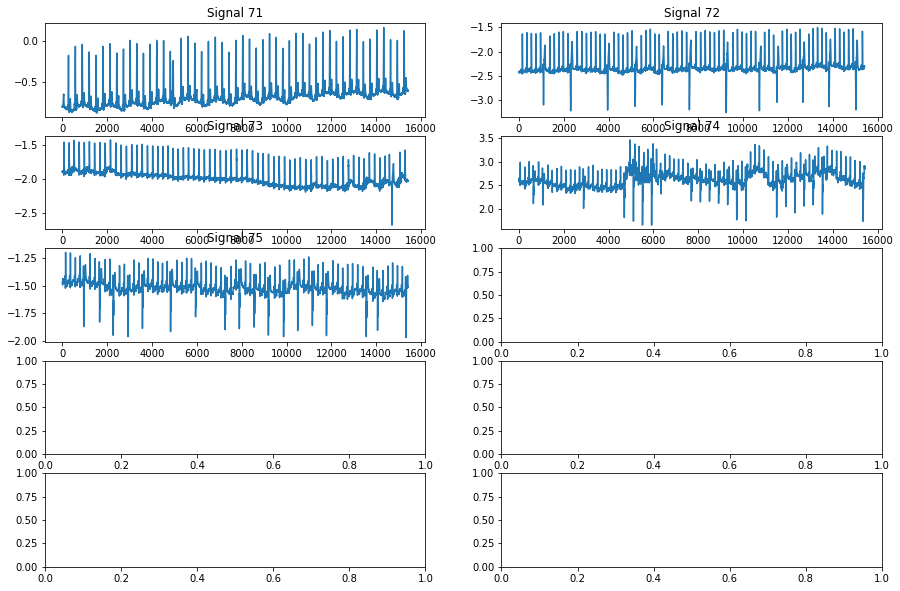

In [436]:
fig, axs = plt.subplots(5, 2, figsize=(15, 10))

for i in range(5):
    axs[i//2,i%2].plot(np.array(df8.iloc[:,i]))
    axs[i//2,i%2].set_title('Signal ' + str(i+index))

In [437]:
df8.to_csv(r'8-LastTenSignals.csv', index = False)